<a href="https://colab.research.google.com/github/snares27/Calculator/blob/main/%5BS25_ML%5D_Linear_regression_exercise_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 5361/6361 Machine Learning**

**Linear Regression Exercise**



**Exercise:**

1.  Classify the MNIST dataset using linear regression by simply treating the class as a continuous variable and then rounding the results.  
2.  Classify the MNIST dataset using linear regression converting the class to a 10-D vector using a one-hot representation.  
3.  Repeat the previous step but now add the squares of the pixel intensities as features.  

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.linear_model import LinearRegression

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f'Original shapes: {x_train.shape=} {y_train.shape=} {x_test.shape=} {y_test.shape=}')
x_train = np.float32(x_train/255).reshape(x_train.shape[0],-1) # Convert every 28x28 image to a 784-element row
x_test = np.float32(x_test/255).reshape(x_test.shape[0],-1)    # Convert every 28x28 image to a 784-element row
print(f'Reshaped arrays: {x_train.shape=} {y_train.shape=} {x_test.shape=} {y_test.shape=}')

Original shapes: x_train.shape=(60000, 28, 28) y_train.shape=(60000,) x_test.shape=(10000, 28, 28) y_test.shape=(10000,)
Reshaped arrays: x_train.shape=(60000, 784) y_train.shape=(60000,) x_test.shape=(10000, 784) y_test.shape=(10000,)


Let's see some images from the MNIST dataset

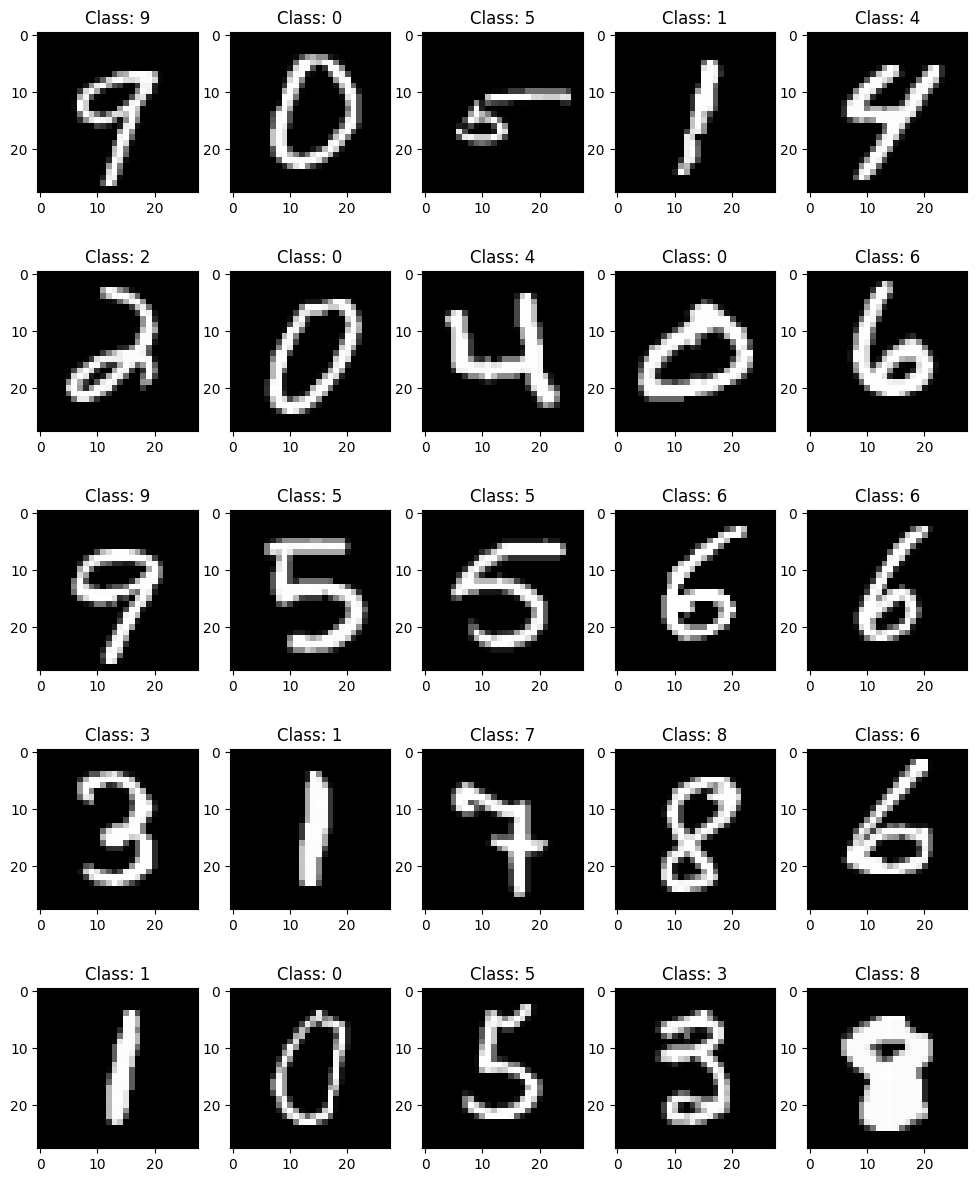

In [ ]:
fig, ax = plt.subplots(nrows=5,ncols=5,figsize=(12,15))
for i in range(5):
  for j in range(5):
    d = np.random.randint(x_train.shape[0])
    ax[i,j].imshow(x_train[d].reshape(28,28),cmap='gray')
    ax[i,j].set_title(f"Class: {y_train[d]}")

### **Question 1**
Classify the MNIST dataset using linear regression by simply treating the class as a continuous variable and then rounding the results.  


In [ ]:
model = LinearRegression()
model.fit(x_train, np.float32(y_train))
pred = model.predict(x_test)
print('Mean squared error = {:5.3f}'.format(mean_squared_error(pred,y_test)))
print('Mean absolute error =  {:5.3f}'.format(mean_absolute_error(pred,y_test)))
pred_int = np.clip(np.round(pred),0,9)

print('Accuracy = {:.4f}'.format(accuracy_score(pred_int,y_test)))
print('Confusion matrix')
print(confusion_matrix(y_test, pred_int))

Mean squared error = 3.146
Mean absolute error =  1.399
Accuracy = 0.2300
Confusion matrix
[[229 322 257 104  35  23   8   2   0   0]
 [  1 228 571 221  89  18   6   1   0   0]
 [ 37 121 247 312 206  86  19   0   4   0]
 [  7  44 197 320 276 100  42  12   9   3]
 [  0   0   5  36 195 340 251 116  36   3]
 [  0   3  21 118 253 288 145  35  18  11]
 [  3   3  24  70 158 272 268 116  42   2]
 [  0   1   7  27  71 135 246 289 152 100]
 [  0   1  10  27  99 194 274 229 101  39]
 [  0   1   5   8  25  60 141 313 321 135]]


### **Question 2**
Classify the MNIST dataset using linear regression converting the class to a 10-D vector using a one-hot representation.  

In [ ]:
# Three different ways to implement the conversion to one hot

def one_hot(y): # Traditional solution
  oh = np.zeros((y.shape[0],np.max(y)+1))
  for i in y:
    oh[i,y[i]] = 1
  return oh

def one_hot(y): # Better solution
  oh = np.zeros((y.shape[0],np.max(y)+1))
  oh[np.arange(y.shape[0]),y] = 1
  return oh

def one_hot(y): # One-line solution
  return np.eye(np.max(y)+1)[y]

y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_train_oh[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train_oh)
pred = model.predict(x_test)

print('Mean squared error = {:5.3f}'.format(mean_squared_error(pred,y_test_oh)))
print('Mean absolute error =  {:5.3f}'.format(mean_absolute_error(pred,y_test_oh)))
pred_int = np.argmax(pred,axis=1)
print('Accuracy = {:.4f}'.format(accuracy_score(pred_int,y_test)))
print('Confusion matrix')
print(confusion_matrix(y_test, pred_int))

Mean squared error = 0.038
Mean absolute error =  0.132
Accuracy = 0.8601
Confusion matrix
[[ 943    0    2    2    2    8   13    2    7    1]
 [   0 1107    2    2    3    1    5    1   14    0]
 [  18   53  812   26   17    0   43   20   38    5]
 [   4   18   21  884    5   16    9   20   22   11]
 [   0   22    7    0  880    5   11    2   11   44]
 [  23   18    3   75   23  660   23   13   38   16]
 [  18   10   10    0   21   17  875    0    7    0]
 [   5   42   15    6   26    0    1  882    0   51]
 [  14   46   11   31   28   41   15   11  758   19]
 [  16   11    3   17   79    0    1   78    4  800]]


In [ ]:
pred[0]

array([ 0.02789915,  0.00518146,  0.10254064,  0.10261391, -0.11788136,
       -0.00851838, -0.0169958 ,  0.90554035, -0.08195885,  0.08157851],
      dtype=float32)

### **Question 3**
Repeat the previous step but now add the squares of the pixel intensities as features.  

In [ ]:
model = LinearRegression()
model.fit(np.hstack((x_train,x_train**2)), y_train_oh)
pred = model.predict(np.hstack((x_test,x_test**2)))

print('Mean squared error = {:5.3f}'.format(mean_squared_error(pred,y_test_oh)))
print('Mean absolute error =  {:5.3f}'.format(mean_absolute_error(pred,y_test_oh)))
pred_int = np.argmax(pred,axis=1)
print('Accuracy = {:.4f}'.format(accuracy_score(pred_int,y_test)))
print('Confusion matrix')
print(confusion_matrix(y_test, pred_int))

Mean squared error = 0.033
Mean absolute error =  0.124
Accuracy = 0.8900
Confusion matrix
[[ 955    0    1    3    1    5    6    1    7    1]
 [   0 1117    3    3    2    1    5    1    3    0]
 [  16   28  853   19   15    2   30   18   46    5]
 [   6   14   20  881    4   15    9   22   29   10]
 [   1   16    8    2  884    2   12    2    7   48]
 [  20    7    3   50   21  718   21   13   22   17]
 [  18    3   10    0   20   20  879    0    8    0]
 [   7   29   14    9   22    0    1  897    2   47]
 [  13   15   10   27   11   25   10    4  842   17]
 [  12   13    3   15   39    0    0   38   15  874]]
